# Model Selection In-Class Exercise

In this example, you will a linear model to data and select the model order by model order selection.  First load the standard packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## Load the Data

The data in this exercise is completely synthetic.  You can load it with the following commmand.

In [2]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit04_model_sel/synth_data.p'
fn_dst = 'synth_data.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

with open(fn_dst,'rb') as fp:
    x,y = pickle.load(fp)

File synth_data.p is already downloaded


Plot the data `y` vs. `x` using a scatter plot. 

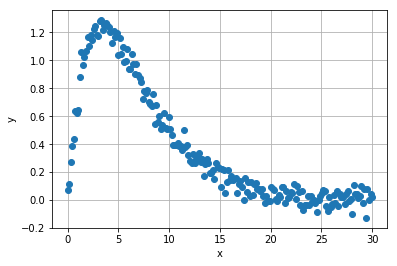

In [3]:
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Fit the Data

We will now try to fit the data.  First, split the data into training and test.  You can use the `train_test_split()` method in the `sklearn` package.

In [4]:
# TODO
xtr, xts, ytr, yts = train_test_split(x,y)
#xtr, xts, ytr, yts = train_test_split(x,y)

Now try to fit a linear model to the data.  You can pick any linear model with a variable number `d` of basis functions.  For example, you can use the polynomials up to degree `d-1`.  

For each model order `d`:
* Fit the model on the training data
* Test the model on the test data

Plot the test error vs. `d`.  Select the model order `dopt` with the lowest test error.

In [9]:
# TODO
import numpy.polynomial.polynomial as poly

s=0
d=15

dtest=np.array(range(0,15))
RSSTest=[]
RSSTrain=[]

ts_err=[]
for i in range(s,d):
    beta=poly.polyfit(xtr,ytr,i)
    yhat=poly.polyval(xtr,beta)
    #ts_err.append(np.sum((yts-yhat)**2)/(2*yts.shape[0]))
    
    #measure the RSS on Training Data
    RSS=np.mean((yhat-ytr)**2)
    RSSTrain.append(RSS)
                  
    #measure RSS on Test data
    beta=poly.polyfit(xts,yts,i)
    yhat=poly.polyval(xts,beta)
    RSS=np.mean((yhat-yts)**2)
    RSSTest.append(RSS)
    
degree=np.array(range(s,d))
#plt.plot(degree,ts_err,'.-',c='b')
plt.plot(degree,RSSTrain,'.-',c='b')
plt.plot(degree,RSSTest,'.-',c='b')

plt.legend(['Train', 'Test'], loc='upper left')

plt.xlabel('d')
plt.ylabel('Test Error')
plt.show()
                  
dopt=np.argmin(ts_err)+s





ValueError: operands could not be broadcast together with shapes (50,) (150,) 

Select the optimal model order `dopt`.  Re-train the model for that model order.  On one plot:
* Plot the predicted value `yhat` vs. `x` for your model for `x in [0,35]`
* Plot a scatter plot of the test data `xts` vs. `yts`

Does your model fit the test data well?
Does it extrapolate reasonably in the range `x >= 30`?

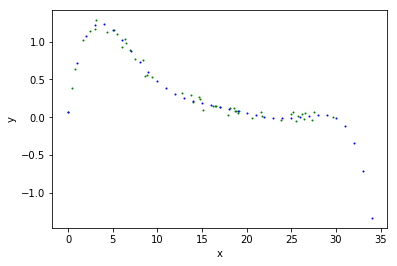

In [54]:
x=np.arange(35)
beta=poly.polyfit(xtr,ytr,dopt)
yhat=poly.polyval(x,beta)
plt.scatter(xts,yts,c='g',s=1)
plt.scatter(x,yhat,c='b',s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
#it fits it pretty well, especially in the range